 **Лабораторная работа. Копысов Марк**
 
**1. Содержательное описание задачи** 
В данной лабораторной работе анализируется датасет, описывающий клиентов банка, содержащий в совокупности разнородные числовые и категориальные признаки. Задачей анализа является построение модели классификации, с помощью которой можно будет одних людей отнести к тем, кто откроет срочный депозит (вклад), а других к тем, кто не станет его открывать.
Для начала, взглянем на обобщенные данные и попробуем сделать какие-либо выводы.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sc
import seaborn
import csv
import sklearn

In [4]:
dataframe = pd.read_csv("bank-full.csv", sep = ';')
dataframe.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Рассмотрим имеющиеся признаки и проведем первичный анализ. 

**2. Объем датасета, количество признаков, количество классов**

Датасет состоит приблизительно из данных по ~45k людям, известна их работа, женаты/замужем ли, образование, баланс (доллары на счету), имеется ли ипотека, имеются ли долги или другие кредиты, каким способом связывались с клиентом, когда в последний раз с ним связывались, и т.д. Общее количество признаков -- 16. Ниже приведены сами признаки и их тип.


1. age -- Возраст (числовой)
2. job -- Работа (менеджмент, техники, домохозяйки, пенсионеры, самозанятые, сфера услуг, студенты, безработные, неизвестно) (категориальный)
3. marital -- Одни, в браке или разведены (категориальный)
4. education -- Образование (среднее, высшее, дополнительное высшее)(категориальный)
5. default -- Имеются ли непогашенные обязательства по кредиту, банкротство (бинарный категориальный)
6. balance -- Баланс, количество денег на счете (числовой)
7. housing -- Имеется ли кредит на жилье (бинарный категориальный)
8. loan -- Имеются ли другие, иные кредиты на личные цели (бинарный категориальный)
9. contact -- Каким методом связывались с клиентом в последний раз -- домашний/мобильный телефон (категориальный)
10. day/month -- Когда с клиентом связывались в последний раз, день недели/месяц (категориальный)
11. duration -- Длительность последнего контакта в секундах (числовой)
12. campaign -- сколько раз во время кампании связывались с клиентом (числовой) 
13. pdays -- сколько дней прошло с последнего контакта (числовой)
14. previous -- сколько раз связывались с клиентом до кампании (числовой)
15. poutcome -- результат последней кампании (бинарный числовой)
16. y -- выходная переменная (согасился ли клиент на депозит?)

Взглянем на среднее, медиану, среднеквадратическое отклонение.

__прим.__ Пропущенных значений в датасете нет.

In [3]:
dataframe.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Для более точных выводов необходимо рассмотреть распределения. Видно, что возраст распределен более-менее нормально. Люди среднего возраста (около 30) больше всего заинтересованы в открытии счёта. Интересно то, что желающие открыть накопительный счёт не обладают какими-либо значительными денежными суммами (см. __balance__, у квартиля 75% меньше 1500$ на счету). Большинство выборки занимают клиенты среднего возраста -- от 33 до 48 лет. Есть клиенты с огромными долгами, в среднем, деньги есть у всех (даже если это незначительные накопления), разброс довольно значителен. Каждый звонок клиенту длится около 4-х минут.

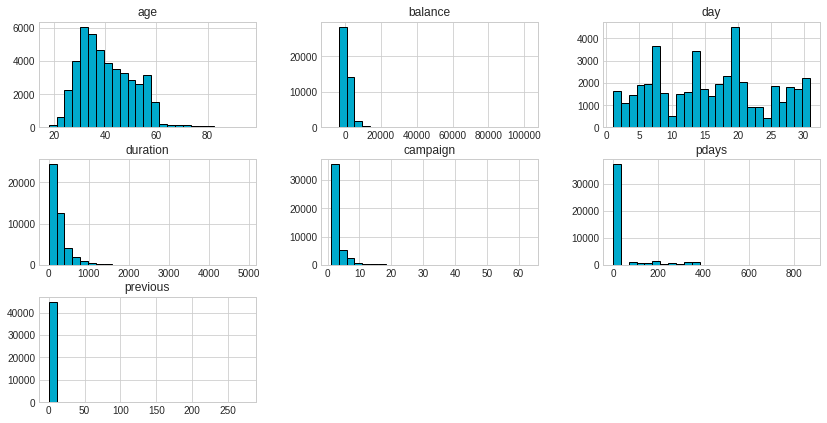

In [4]:
plt.style.use('seaborn-whitegrid')
dataframe.hist(bins = 25, figsize = (14, 7), color = "#00AACC", edgecolor = 'black')
plt.show()

Проанализировав образование клиентов, видно, что значительное большинство от вклада отказываются. Больше всего вклады берут люди со среднем (secondary) образованием, затем люди с высшим/дополнительным (teritary). 

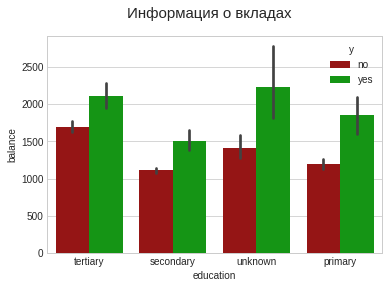

In [5]:
labels = "Отказались от вклада", "Открыли вклад"
plt.suptitle("Информация о вкладах", fontsize = 15)
colors = ["#AA0000", "#00AA00"]
seaborn.barplot(
    x         = "education",
    y         = "balance",
    hue       = "y",
    data      = dataframe,
    palette   = colors,
)
plt.show()

Выразим согласившихся/отказавшихся в процентном соотношении. Классы значительно несбалансированы.

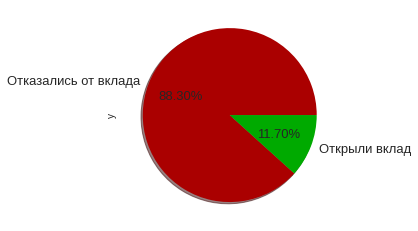

In [6]:
dataframe["y"]       \
    .value_counts()  \
    .plot            \
    .pie(autopct = "%1.2f%%", shadow = True, colors = colors, labels = labels, fontsize = 13)
plt.show()

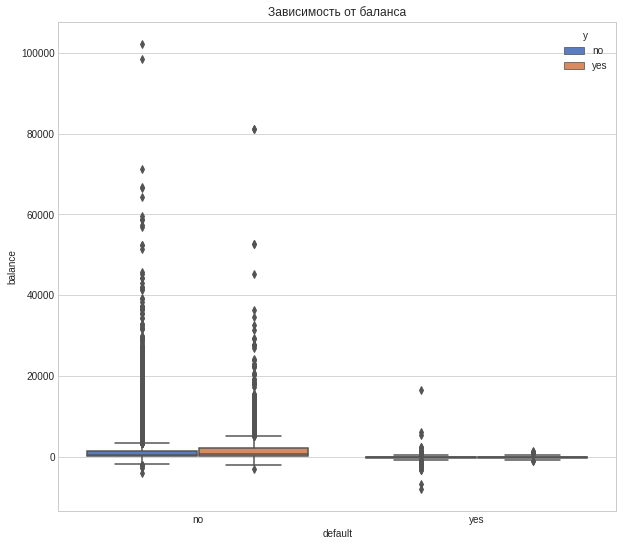

In [7]:
figure, axis = plt.subplots(figsize = (10, 9))
first = seaborn.boxplot(x = "default", y = "balance", hue = "y", data = dataframe, palette = "muted")
first.set_title("Зависимость от баланса")
plt.show()

Примерно видно, что больше всего получают люди из сектора Management, студенты и безработные, логично, обычно безденежные и не хотят брать депозиты. Люди на пенсии более склонны брать или продлевать депозит (тоже логично, т.к. накопления позволяют безбедно перенести пенсию, и накопленное можно будет передать по наследству). Интересно, что у студентов нет долгов, а отрицательные счета наблюдаются в значительной степени у сектора менеджмента и у "синих воротничков". 

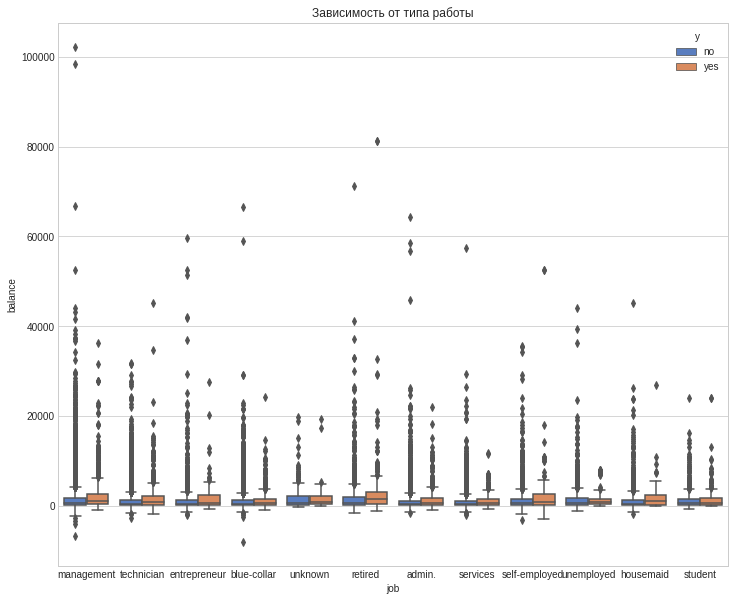

In [8]:
figure, axis = plt.subplots(figsize = (12, 10))
second = seaborn.boxplot(x = "job", y = "balance", hue = "y", data = dataframe, palette = "muted")
second.set_title("Зависимость от типа работы")
plt.show()

Больше всего данных было собрано о менеджерах/начальниках, о "синих воротничках" (физический труд с почасовой оплатой), о техниках. Незначительная часть людей отказались предоставлять информацию о себе.

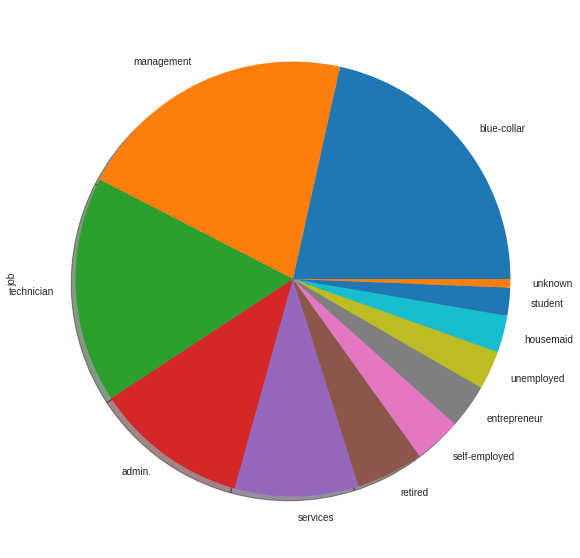

In [9]:
figure, axis = plt.subplots(figsize = (10, 10))
dataframe["job"].value_counts().plot.pie(shadow = True)
plt.show()

По сути, ничего особенного выделить нельзя. Очевидно, что все люди на пенсии (retired) редко младше 50, а в основном -- около 70. Также очевидно, что почти все студенты молодые. Предприниматели более "редко" распределены по возрасту, он может быть как и молодой, так и пожилой. Нет конкретной связи между возрастом и безработицей. Очень мало молодых домохозяек. 

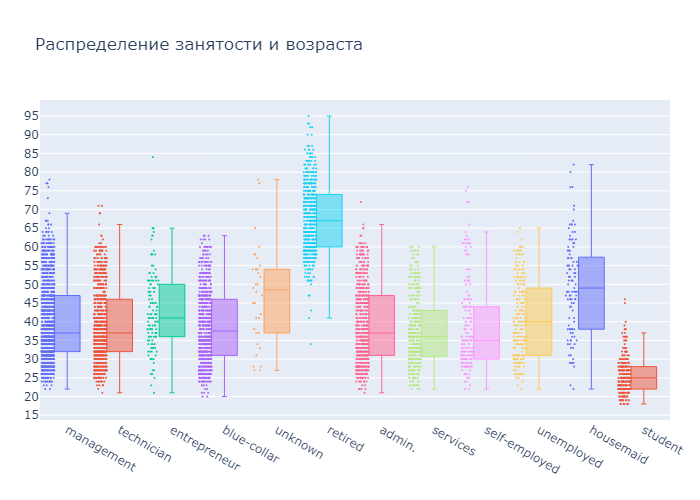

In [43]:
from plotly import tools
import chart_studio.plotly
import plotly.figure_factory
import plotly.graph_objs
from IPython.display import Image

deposited = dataframe.loc[dataframe["y"] == "yes"]
employment = dataframe["job"].unique().tolist()
ages = [deposited["age"].loc[deposited["job"] == name].values for name in employment]

data = [plotly.graph_objs.Box(
        y            = ys,
        name         = xs,
        boxpoints    = 'all',
        jitter       = 0.5,
        whiskerwidth = 0.2,
        marker       = dict(size = 2,),
        line         = dict(width = 1)) for xs, ys in zip(employment, ages)]
layout = plotly.graph_objs.Layout(
    title = "Распределение занятости и возраста",
    yaxis = dict(
        autorange     = True,
        showgrid      = True,
        zeroline      = True,
        dtick         = 5,
        gridcolor     = 'rgb(255, 255, 255)',
        gridwidth     = 1,
        zerolinecolor = 'rgb(255, 255, 255)',
        zerolinewidth = 2,
    ),
    margin = dict(l = 40, r = 30, b = 80, t = 100,),
    showlegend = False
)

figure = plotly.graph_objs.Figure(data = data, layout = layout)
figure.write_image("fig1.png")
# plot.ly refuses to be rendered both on GitHub and JupyterLab. What a shame.
# If you ever encounter this particular line and would like to execute a script on your local machine, uncomment:
# figure.show()
# ... and comment a line below.
Image(filename = 'fig1.png') 

Теперь попробуем проанализировать семейное положение. Видно, что большая часть жената/замужем, и меньшая часть никогда не была жената/замужем. Есть определенный процент разведенных людей. Пока что, выводы поверхностные, попробуем немного углубиться. 

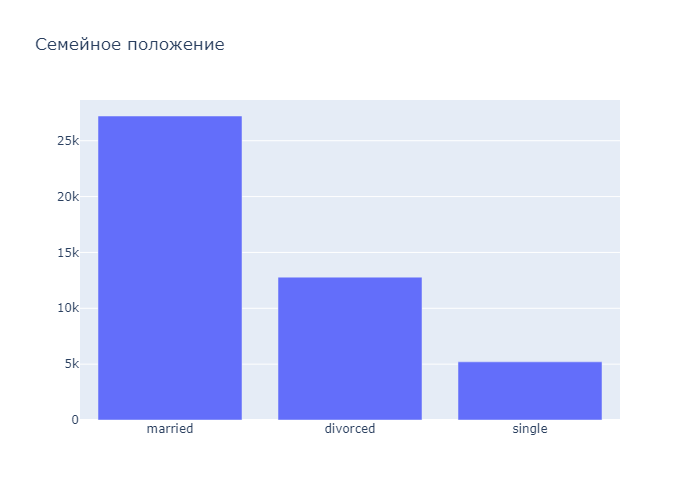

In [44]:
values = dataframe["marital"].value_counts().tolist()
labels = ["married", "divorced", "single"]
data = [plotly.graph_objs.Bar(x = labels, y = values)]
layout = plotly.graph_objs.Layout(title = "Семейное положение")
figure = plotly.graph_objs.Figure(data = data, layout = layout)
figure.write_image("fig2.png")
Image(filename = 'fig2.png') 

Интересно, что у разведенных на балансе денег значительно меньше. Также уровень доходов напрямую коррелирует с качеством образования. Что же, возьмём на заметку :)

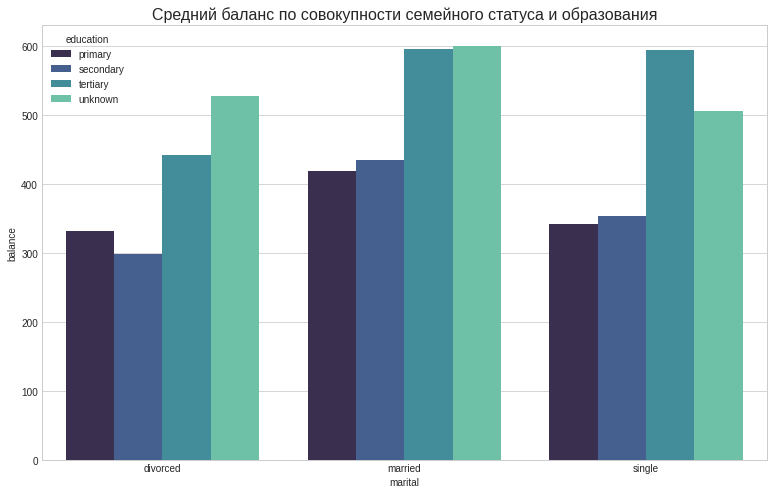

In [10]:
groups = dataframe.groupby(["marital", 'education'], as_index = False)["balance"].median()
figure = plt.figure(figsize = (13, 8))
seaborn.barplot(
    x       = "marital",
    y       = "balance",
    hue     = "education",
    data    = groups,
    palette = "mako"
)
plt.title("Средний баланс по совокупности семейного статуса и образования", fontsize = 16)
plt.show()

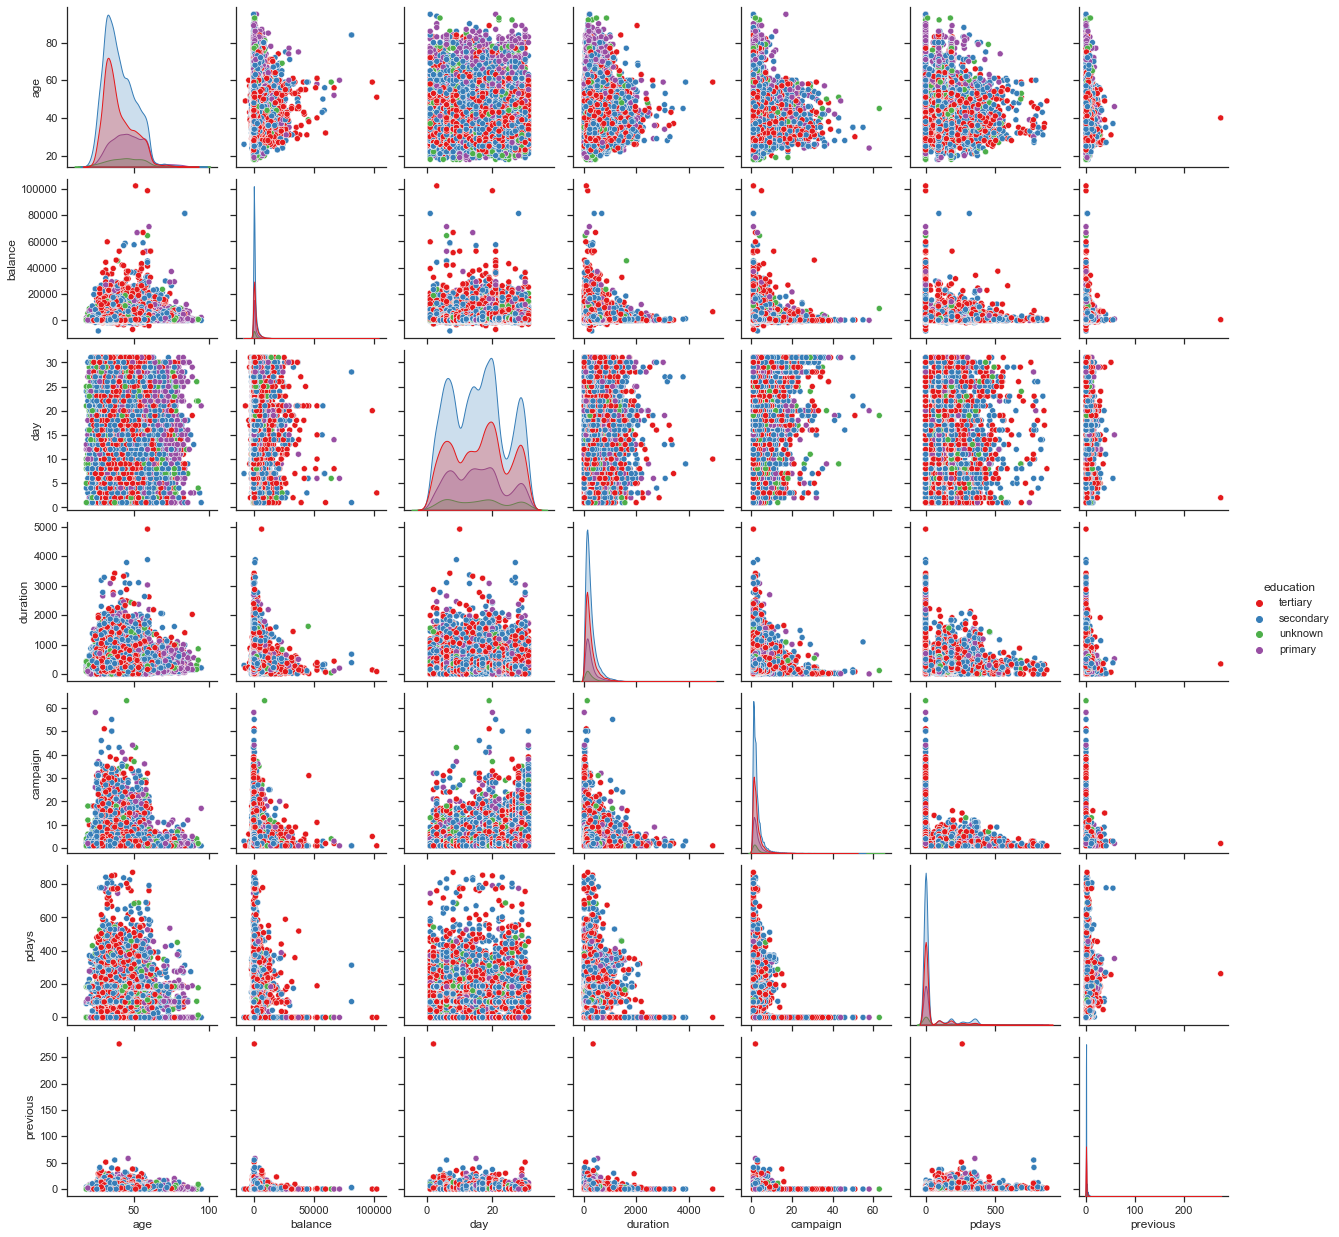

In [46]:
seaborn.set(style = "ticks")
seaborn.pairplot(dataframe, hue = "education", palette = "Set1")
plt.show()

По pairwise-plot особо сказать ничего нельзя. Судя по данным, банк сначала опрашивает людей с высшим образованием, а затем со средним (см. распр. day), выделяются несколько десятков богатых людей с высшим образованием.
Попробуем же теперь рассмотреть характеристику **duration**. Возможно, чем дольше мы будем уговаривать человека на открытие счёта, тем больше вероятность того, что он согласится с нашим подходом. Или наоборот?

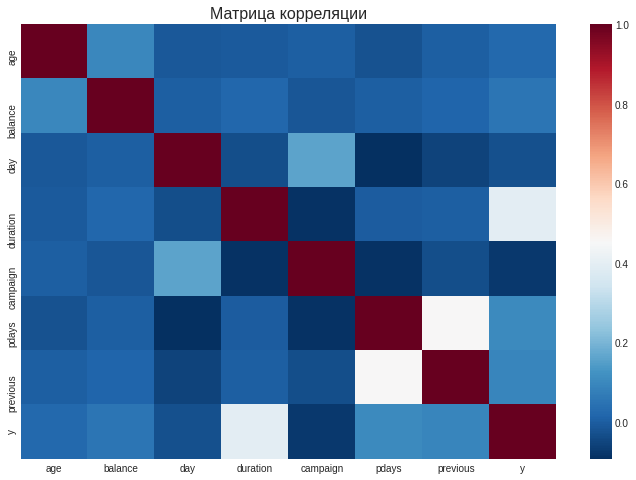

In [5]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
figure = plt.figure(figsize = (12, 8))
dataframe["y"] = sklearn.preprocessing.LabelEncoder().fit_transform(dataframe["y"])
# Since all the categorical types are represented by "object" type, we can surely drop it.
numeric = dataframe.select_dtypes(exclude = "object")
correlation_matrix = numeric.corr()
seaborn.heatmap(correlation_matrix, cbar = True, cmap = "RdBu_r")
plt.title("Матрица корреляции", fontsize = 16)
plt.show()

Отказывается, что ни возраст, ни баланс, ни другие характеристики не влияют на вероятность открытия счёта. Зато продолжительность звонка в какой-то степени коррелирует.

In [6]:
dataframe['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [5]:
def bool_dummy(row, column):
    return 1 if row[column] == "yes" else 0

def get_values(row, column, threshold, dataframe):
    if row[column] <= threshold: return row[column]
    else: return dataframe[dataframe[column] <= threshold][column].mean()
    
# TO-DO: re-write, this is horrible. 
def clean(dataframe):
    cleaned     = dataframe.copy()
    to_drop     = ["default", "housing", "loan"]
    categorical = ["job", "marital", "education", "contact", "month", "poutcome"]
    for column in to_drop: 
        cleaned[column + '_bool'] = dataframe.apply(lambda row: bool_dummy(row, column), axis = 1)
    cleaned     = cleaned.drop(columns = to_drop)
    for column in categorical:
        cleaned = pd.concat(
            [cleaned.drop(column, axis = 1), pd.get_dummies(
                cleaned[column], 
                prefix     = column, 
                prefix_sep = '_', 
                drop_first = True,
                dummy_na   = False
            )],
            axis = 1
        )
    cleaned = cleaned.drop(columns = ['pdays'])
    cleaned['cleaned_campaign'] = dataframe.apply(lambda row: get_values(row, 'campaign', 34, cleaned), axis = 1)
    cleaned['cleaned_previous'] = dataframe.apply(lambda row: get_values(row, 'previous', 34, cleaned), axis = 1)
    cleaned = cleaned.drop(columns = ['campaign', 'previous'])
    return cleaned

In [6]:
cleaned = clean(dataframe)
cleaned.head()

,age,balance,day,duration,y,default_bool,housing_bool,loan_bool,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,cleaned_campaign,cleaned_previous
0,58,2143,5,261,no,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,44,29,5,151,no,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,33,2,5,76,no,0,1,1,0,1,...,0,1,0,0,0,0,0,1,1.0,0.0
3,47,1506,5,92,no,0,1,0,1,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,33,1,5,198,no,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0


In [7]:
import sklearn.model_selection
import sklearn.pipeline
X = cleaned.drop(columns = 'y')
y = cleaned['y']

In [8]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.3, random_state = 42)

Попробуем прогнать KN-classifier и взглянуть на точность. Дополнительный анализ проведен не был (можно было построить кривые ROC-AUC), сравним точность с XGBoost.

In [9]:
import sklearn.neighbors
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train.squeeze().values)
y_train_preds_knn, y_test_preds_knn = knn.predict(X_train), knn.predict(X_test)
print('acc_train_knn: %.3f: acc_test_knn: %.3f' % (
    sklearn.metrics.accuracy_score(y_train, y_train_preds_knn),
    sklearn.metrics.accuracy_score(y_test, y_test_preds_knn)
))

acc_train_knn: 0.904: acc_test_knn: 0.876


**Выводы**

1. Судя по имеющимся распределениям, приоритетным направлением должен быть сектор менеджмента, а также люди, занимающиеся физическим трудом.

2. Следует ориентироваться на людей с образованием -- больше шанс на открытие депозита (т.к. их больше в количественном соотношении, что очевидно).

3. По матрице корреляции можно сказать две вещи. Чем дольше мы звоним (объясняем, какие достоинства у наших депозитов), тем больше вероятность, что клиент согласится. С точки зрения здравого смысла это не всегда верно -- надоедливость может клиента отпугнуть. Также, нужно продолжать работать с теми, с кем уже состоялся длительный разговор.
   
4. Также необходимо ориентироваться необходимо на людей постарше -- как видно по pairwise-plot, где-то в середине balance максимальный.

5. Самыми значительными признаками, которые позволили бы определить вероятность открытия счёта -- длительность предыдущего контакта (причём неизвестно, какого рода, видимо, предполагается очная встреча в отделении банка, например), март и июнь (на этот период приходится наибольшее количество согласий), а также длительность последнего контакта.

**Часть 2. PCA**

У нас уже есть разделенная выборка. Попробуем теперь прогнать PCA с двумя компонентами и также запустить SVM. Посмотрим на результаты. Нормализуем данные.

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

In [81]:
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

In [82]:
clf = sklearn.svm.SVC()
clf.fit(X_t_train, y_train)
print('score', clf.score(X_t_test, y_test))
print('pred label', clf.predict(X_t_test))

score 0.8823355942199941
pred label [0 0 0 ... 0 0 0]


In [83]:
transformed = pca.fit_transform(X)

In [84]:
pca_df = pd.DataFrame(data = transformed, columns = ['Principal Component 1', 'Principal Component 2'])
concatenated = pd.concat([pca_df, dataframe[['y']]], axis = 1)
concatenated

,Principal Component 1,Principal Component 2,y
0,780.737503,1.410463,0
1,-1333.465661,-104.702618,0
2,-1360.607120,-179.649834,0
3,143.424431,-166.416046,0
4,-1361.383012,-57.648249,0
...,...,...,...
45206,-535.947347,719.817478,1
45207,367.100969,197.154006,1
45208,4354.326784,860.828296,1
45209,-693.806487,251.104459,0


Очень интересно, но соотношение показывает, что одна компонента объясняет 99% вариации. (т.е. 99% информации содержится в первой principal component).

In [85]:
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ 3.41021693e-04  9.99998254e-01  1.22944022e-05  1.83671734e-03
  -2.91665214e-06 -1.12222068e-05 -1.01623296e-05 -6.58133679e-06
   5.64801624e-07  8.90588375e-08  9.05657365e-06  3.35988844e-06
   1.07639998e-06 -3.61936177e-06  5.76566142e-08 -1.98749889e-06
   4.95954077e-07  2.81763566e-07  4.13253505e-06 -1.85419287e-06
  -1.14807442e-05  1.25716843e-05  7.28762205e-07  3.06038448e-06
  -5.55226221e-06  9.74523400e-07  4.86860825e-07 -2.72982327e-07
  -1.39076269e-06 -7.60407509e-06  3.13384180e-06  7.78371017e-07
  -1.07492009e-05  1.08990841e-05  1.67304208e-06  8.09642820e-07
   5.49351460e-07  2.08065125e-06 -3.84035888e-06 -1.40609619e-05
   1.31300580e-05]
 [-2.79821557e-04 -1.83662075e-03 -9.80865578e-04  9.99997328e-01
  -4.43089301e-06  1.26862096e-05 -1.50779760e-05  1.70796142e-05
  -1.06499438e-06 -5.12854488e-06 -1.54785767e-05  2.11905374e-05
   4.98894355e-06  2.53258494e-06 -3.61443902e-06 -1.28190954e-05
   1.30814715e-05 -2.04748056e-06 -4.42045913e-05  3.6056

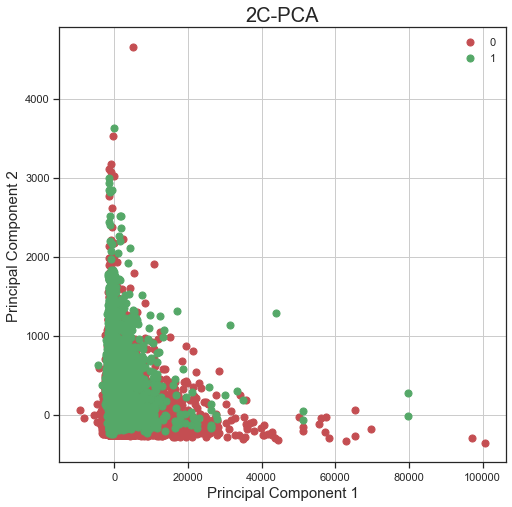

In [86]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2C-PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indices = concatenated['y'] == target
    ax.scatter(concatenated.loc[indices, 'Principal Component 1'], 
               concatenated.loc[indices, 'Principal Component 2'],
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

По факту, нельзя сказать, что PCA работает некорректно. Можно сделать вывод, что не имеет смысл брать больше переменных, т.к. одна переменная объясняет практически всё. Следовательно, имеет смысл предположить, что какая-то из переменных в датасете и выходная переменная строго коррелированы. По графику XGBoost выше, также можно дать предположение, что это poutcome_success -- т.е. если раньше клиент брал депозит, то очень вероятно, что он возьмет его и в следующий раз.

**Вывод:** одного PCA недостаточно. Следует использовать EDA (exploratory data analysis) для нахождения скрытых зависимостей, а также иметь знания по какой-то конкретной области, с которой нужно провести работу. 

**Часть 2.** Нейронная сеть.
Используем функции, описанные в предыдущей лабораторной работе. Чтобы правильно представить категориальные признаки для нейронной сети, необходимо их перекодировать.
Воспользуемся one-hot-encoding и преобразуем данные.

In [5]:
encoded = clean(dataframe)
X = encoded.drop(columns = 'y')
y = encoded['y']

In [6]:
X

,age,balance,day,duration,default_bool,housing_bool,loan_bool,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,cleaned_campaign,cleaned_previous
0,58,2143,5,261,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
1,44,29,5,151,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
2,33,2,5,76,0,1,1,0,1,0,...,0,1,0,0,0,0,0,1,1.0,0.0
3,47,1506,5,92,0,1,0,1,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
4,33,1,5,198,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,3.0,0.0
45207,71,1729,17,456,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,2.0,0.0
45208,72,5715,17,1127,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,5.0,3.0
45209,57,668,17,508,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,4.0,0.0


In [7]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import sklearn
import numpy
import copy
from sklearn import model_selection

TEST_SIZE = 0.2

def data_preprocess(dataframe):
    dataframe = copy.deepcopy(dataframe)
    dataframe['y'] = dataframe['y'].map({'yes': 1, 'no': 0})
    preprocessed = clean(dataframe)
    X = preprocessed.drop(columns = 'y')
    y = preprocessed['y']
    return copy.deepcopy(X), copy.deepcopy(y)

def model_wrapper(layers, data, epochs):
    m = Sequential()
    for layer in layers:
        m.add(layer)
    optimizer = SGD(lr = 0.01)
    m.compile(
        loss = 'binary_crossentropy', 
        optimizer = optimizer, 
        metrics = ['accuracy'])
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data[0], data[1], test_size = TEST_SIZE, random_state = numpy.random.randint(0, 10 ** 6))
    history = m.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = epochs, batch_size = 128, shuffle = True)
    scores = m.evaluate(X_test, y_test)
    return m, scores, history

X, y = data_preprocess(dataframe)

m, scores, history = model_wrapper(
   [ Dense(10,
        input_dim = X.shape[1],
        activation = 'relu'),
     Dense(1, 
        activation = 'sigmoid')
   ],      
   [X, y], # Data is preprocessed within the function, so it does not have to be manually processed each time and can simply be passed.
   5
)

Epoch 1/5
283/283 [==============================] - 1s 2ms/step - loss: 48.1294 - accuracy: 0.8420 - val_loss: 3.4787 - val_accuracy: 0.8812
Epoch 2/5
283/283 [==============================] - 0s 2ms/step - loss: 1.4770 - accuracy: 0.8817 - val_loss: 0.7115 - val_accuracy: 0.8808
Epoch 3/5
283/283 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.8798 - val_loss: 2.3365 - val_accuracy: 0.8813
Epoch 4/5
283/283 [==============================] - 0s 2ms/step - loss: 0.7779 - accuracy: 0.8824 - val_loss: 0.6537 - val_accuracy: 0.8811
Epoch 5/5
283/283 [==============================] - 0s 861us/step - loss: 0.6614 - accuracy: 0.8812


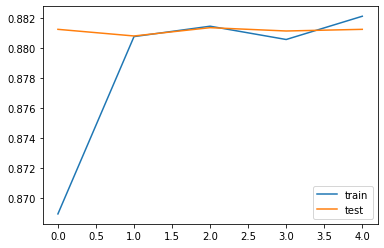

In [28]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()

In [34]:
print("\n%s: %.2f%%" % (m.metrics_names[1], scores[1]*100))


accuracy: 88.12%


In [29]:
m, scores, history = model_wrapper(
   [ Dense(350,
        input_dim = X.shape[1],
        activation = 'relu'),
     Dense(50, 
        activation = 'tanh'),
     Dense(1, 
        activation = 'sigmoid')
   ],      
   [X, y], # Data is preprocessed within the function, so it does not have to be manually processed each time and can simply be passed.
   10
)

Epoch 1/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3602 - accuracy: 0.8833 - val_loss: 0.3538 - val_accuracy: 0.8812
Epoch 2/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3420 - accuracy: 0.8830 - val_loss: 0.3435 - val_accuracy: 0.8812
Epoch 3/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8826 - val_loss: 0.3451 - val_accuracy: 0.8812
Epoch 4/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3350 - accuracy: 0.8835 - val_loss: 0.3377 - val_accuracy: 0.8812
Epoch 5/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3357 - accuracy: 0.8812 - val_loss: 0.3288 - val_accuracy: 0.8812
Epoch 6/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8836 - val_loss: 0.3392 - val_accuracy: 0.8812
Epoch 7/10
283/283 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8830 - val_loss: 0.3419 - val_accuracy: 0.8812
Epoch 

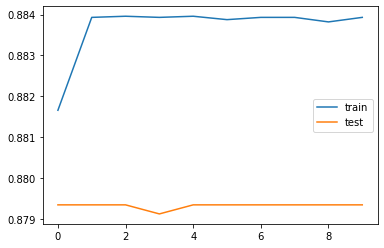

In [20]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()

In [35]:
print("\n%s: %.2f%%" % (m.metrics_names[1], scores[1]*100))


accuracy: 88.12%


In [42]:
m, scores, history = model_wrapper(
   [ Dense(16,
        input_dim = X.shape[1],
        activation = 'relu'),
     Dense(16, 
        activation = 'relu'),
     Dense(16,
        activation = 'relu'),
     Dense(1, 
        activation = 'sigmoid')
   ],      
   [X, y], # Data is preprocessed within the function, so it does not have to be manually processed each time and can simply be passed.
   5
)

Epoch 1/5
283/283 [==============================] - 1s 2ms/step - loss: 43.8848 - accuracy: 0.8633 - val_loss: 0.4939 - val_accuracy: 0.8747
Epoch 2/5
283/283 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8827 - val_loss: 0.3809 - val_accuracy: 0.8812
Epoch 3/5
283/283 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8819 - val_loss: 0.3686 - val_accuracy: 0.8810
Epoch 4/5
283/283 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8814 - val_loss: 0.3661 - val_accuracy: 0.8812
Epoch 5/5
283/283 [==============================] - 0s 1ms/step - loss: 0.3657 - accuracy: 0.8812


In [39]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = TEST_SIZE, random_state = numpy.random.randint(0, 10 ** 6))
classifier = MLPClassifier(random_state = numpy.random.randint(0, 10 ** 6), max_iter = 300)
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.8989273471193188

In [44]:
m, scores, history = model_wrapper(
   [ Dense(32,
        input_dim = X.shape[1],
        activation = 'selu'),
     Dense(32, 
        activation = 'selu'),
     Dense(1,
        activation = 'sigmoid'),
   ],      
   [X, y], # Data is preprocessed within the function, so it does not have to be manually processed each time and can simply be passed.
   5
)

Epoch 1/5
283/283 [==============================] - 1s 2ms/step - loss: 74810.8198 - accuracy: 0.8198 - val_loss: 591.4997 - val_accuracy: 0.8812
Epoch 2/5
283/283 [==============================] - 1s 2ms/step - loss: 582.0754 - accuracy: 0.8829 - val_loss: 587.5871 - val_accuracy: 0.8812
Epoch 3/5
283/283 [==============================] - 1s 2ms/step - loss: 576.5421 - accuracy: 0.8833 - val_loss: 583.6727 - val_accuracy: 0.8812
Epoch 4/5
283/283 [==============================] - 0s 2ms/step - loss: 569.9512 - accuracy: 0.8838 - val_loss: 579.7574 - val_accuracy: 0.8812
Epoch 5/5
283/283 [==============================] - 0s 915us/step - loss: 575.8446 - accuracy: 0.8812


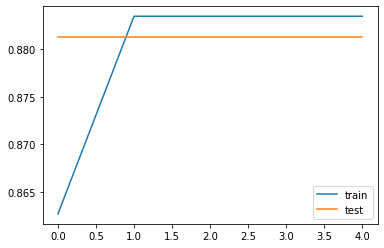

In [47]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()

In [48]:
m, scores, history = model_wrapper(
   [ Dense(16,
        input_dim = X.shape[1],
        activation = 'relu'),
     Dropout(0.5),
     Dense(16, 
        activation = 'relu'),
     Dropout(0.5),
     Dense(16,
        activation = 'relu'),
     Dropout(0.5),
     Dense(1, 
        activation = 'sigmoid')
   ],      
   [X, y], # Data is preprocessed within the function, so it does not have to be manually processed each time and can simply be passed.
   5
)

Epoch 1/5
283/283 [==============================] - 1s 2ms/step - loss: 4.4589 - accuracy: 0.8589 - val_loss: 0.4376 - val_accuracy: 0.8812
Epoch 2/5
283/283 [==============================] - 1s 2ms/step - loss: 0.4462 - accuracy: 0.8823 - val_loss: 0.3895 - val_accuracy: 0.8812
Epoch 3/5
283/283 [==============================] - 1s 2ms/step - loss: 0.3944 - accuracy: 0.8822 - val_loss: 0.3749 - val_accuracy: 0.8812
Epoch 4/5
283/283 [==============================] - 1s 2ms/step - loss: 0.3740 - accuracy: 0.8841 - val_loss: 0.3665 - val_accuracy: 0.8812
Epoch 5/5
283/283 [==============================] - 0s 868us/step - loss: 0.3653 - accuracy: 0.8812


In [54]:
from tensorflow.keras import regularizers

m, scores, history = model_wrapper(
   [ Dense(16,
        input_dim = X.shape[1], kernel_regularizer = regularizers.l2(0.01),
        activation = 'relu'),
     Dense(16, kernel_regularizer=regularizers.l2(0.01),
        activation = 'relu'),
     Dense(1, 
        activation = 'sigmoid')
   ],      
   [X, y], # Data is preprocessed within the function, so it does not have to be manually processed each time and can simply be passed.
   5
)

Epoch 1/5
283/283 [==============================] - 1s 2ms/step - loss: 14.5483 - accuracy: 0.8316 - val_loss: 1.2401 - val_accuracy: 0.8810
Epoch 2/5
283/283 [==============================] - 1s 2ms/step - loss: 1.2069 - accuracy: 0.8840 - val_loss: 1.1438 - val_accuracy: 0.8801
Epoch 3/5
283/283 [==============================] - 1s 2ms/step - loss: 1.1147 - accuracy: 0.8826 - val_loss: 1.0535 - val_accuracy: 0.8812
Epoch 4/5
283/283 [==============================] - 1s 2ms/step - loss: 1.0296 - accuracy: 0.8831 - val_loss: 0.9770 - val_accuracy: 0.8813
Epoch 5/5
283/283 [==============================] - 0s 1ms/step - loss: 0.9187 - accuracy: 0.8817


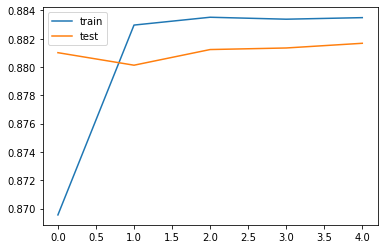

In [55]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()

**Часть 3. Деревья**

Рассмотрим два вида деревьев: RandomForestClassifier (случайные деревья) и Gradient Boosting Decision Tree.
Переберем глубину деревьев (с 15 до 225 с шагом в 15), и количество "фичей" (The number of features to consider when looking for the best split).
Избавимся от рандомизации, зафиксировав seed.

In [19]:
from tqdm import tqdm
import sklearn.ensemble
oob = {
    "sqrt": [],
    "log2": [],
    None:   []
}
for feature in ["sqrt", "log2", None]:
    for estimators in tqdm(np.arange(15, 225, 15)):
        model = sklearn.ensemble.RandomForestClassifier(
            oob_score = True,
            warm_start = True,
            random_state = 42,
            max_features = feature,
            n_estimators = estimators
        )
        model.fit(X_train, y_train.squeeze().values)
        oob[feature].append(model.oob_score_)

  0%|          | 0/14 [00:00<?, ?it/s]c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
  0%|          | 0/14 [00:00<?, ?it/s]c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in

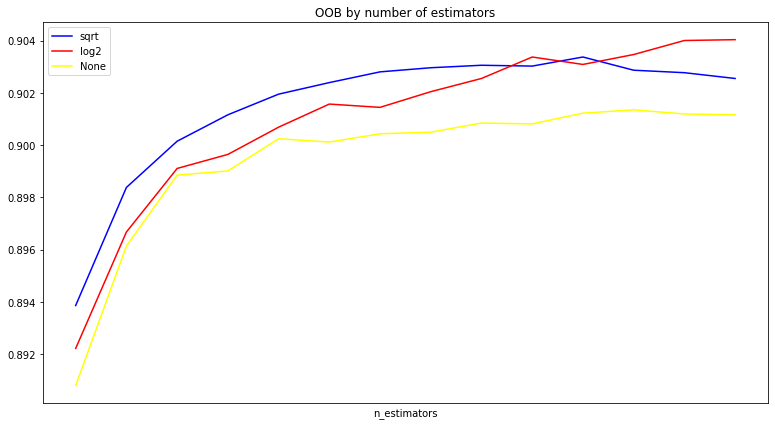

In [20]:
plt.figure(figsize = (13, 7))
plt.plot(oob['sqrt'], label = 'sqrt', color = 'blue')
plt.plot(oob['log2'], label = 'log2', color = 'red')
plt.plot(oob[None], label = 'None', color = 'yellow')
plt.xticks(np.arange(15, 225, 15))
plt.xlabel('n_estimators')
plt.title('OOB by number of estimators')
plt.legend()
plt.plot();

In [21]:
errors = { 'train': [], 'test':  [], }
for estimators in tqdm(np.arange(15, 225, 15)):
    model = sklearn.ensemble.RandomForestClassifier(
        oob_score = True,
        warm_start = True,
        random_state = 42,
        max_features = feature,
        n_estimators = estimators
    )
    model.fit(X_train, y_train.squeeze().values)
    errors['train'].append(model.score(X_train, y_train))
    errors['test'].append(model.score(X_test, y_test))

  0%|          | 0/14 [00:00<?, ?it/s]c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
100%|██████████| 14/14 [04:14<00:00, 18.21s/it]


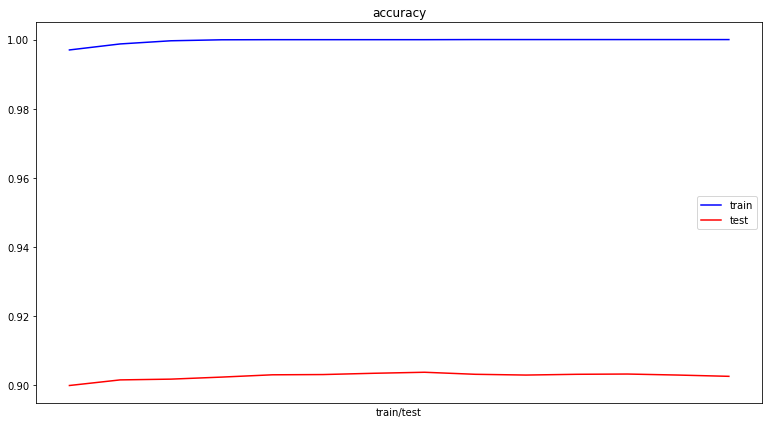

In [23]:
plt.figure(figsize = (13, 7))
plt.plot(errors['train'], label = 'train', color = 'blue')
plt.plot(errors['test'], label = 'test', color = 'red')
plt.xticks(np.arange(15, 225, 15))
plt.xlabel('train/test')
plt.title('accuracy')
plt.legend()
plt.plot();

In [24]:
import xgboost
scores = {'train': [], 'test': []}
for estimators in tqdm(np.arange(15, 225, 15)):
    xgb = xgboost.XGBClassifier(n_estimators = estimators, learning_rate = 0.1, subsample = 0.7)
    xgb.fit(X_train, y_train.squeeze().values)
    y_train_preds, y_test_preds = xgb.predict(X_train), xgb.predict(X_test)
    scores['train'].append(sklearn.metrics.accuracy_score(y_train, y_train_preds))
    scores['test'].append(sklearn.metrics.accuracy_score(y_test, y_test_preds))

  0%|          | 0/14 [00:00<?, ?it/s]c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
  7%|▋         | 1/14 [00:00<00:04,  2.88it/s]c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  wa

[02:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:39:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:39:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

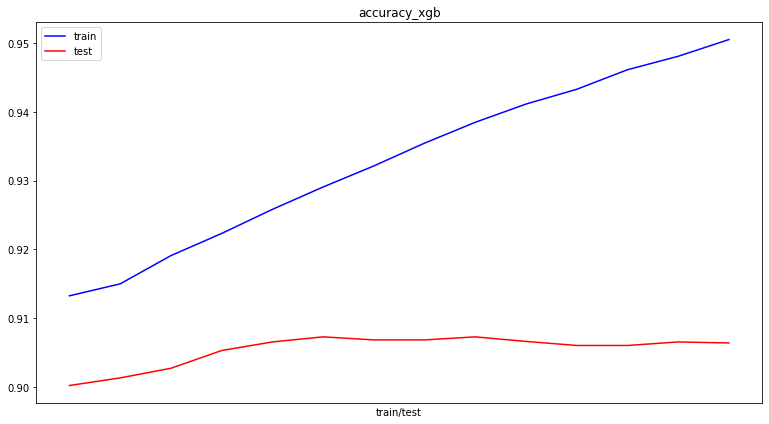

In [25]:
plt.figure(figsize = (13, 7))
plt.plot(scores['train'], label = 'train', color = 'blue')
plt.plot(scores['test'], label = 'test', color = 'red')
plt.xticks(np.arange(15, 225, 15))
plt.xlabel('train/test')
plt.title('accuracy_xgb')
plt.legend()
plt.plot();

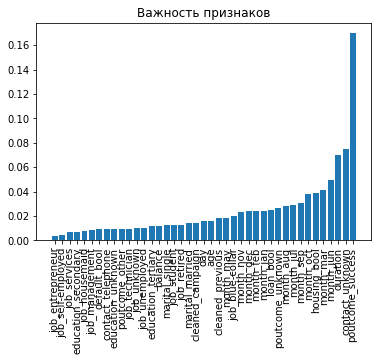

In [11]:
headers = ["Feature", "Score"]
feature_df = pd.DataFrame(sorted(zip(X_train.columns, xgb.feature_importances_), key = lambda x: x[1]), columns = headers)
x_pos = np.arange(0, len(feature_df))
plt.bar(x_pos, feature_df["Score"])
plt.xticks(x_pos, feature_df["Feature"])
plt.xticks(rotation = 90)
plt.title('Важность признаков')
plt.show()

Модели на основе деревьев решений хорошо справляются с задачей бинарной классификации. Можно отметить, что по качеству классификации выигрывает XGBoost, хоть и незначительно.
Данный набор данных выделяется строгой корреляцией между двумя признаками, и поэтому практически любой метод классификации подойдет.

**Часть 4. Кластеризация**
К сожалению, из-за объема данных было проблематично кластеризацию визуализировать.
Попробуем нормализовать данные перед кластеризацией. Попробуем два метода: аггломеративная кластеризация и DBSCAN.

In [9]:
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_train

,age,balance,day,duration,default_bool,housing_bool,loan_bool,job_blue-collar,job_entrepreneur,job_housemaid,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,cleaned_campaign,cleaned_previous
10747,0.233766,0.077762,0.533333,0.031110,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.090909,0.00000
26054,0.493506,0.079988,0.600000,0.063440,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.060606,0.00000
9125,0.363636,0.077762,0.133333,0.016877,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.030303,0.00000
41659,0.298701,0.116671,0.000000,0.061407,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.000000,0.15625
4443,0.259740,0.077762,0.633333,0.018300,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.337662,0.089789,0.566667,0.425580,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00000
44732,0.064935,0.083531,0.233333,0.042700,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.03125
38158,0.207792,0.092719,0.466667,0.048597,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00000
860,0.194805,0.079636,0.200000,0.022570,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00000


In [31]:
print(y_train)

10747     no
26054     no
9125      no
41659     no
4443      no
        ... 
11284    yes
44732     no
38158     no
860       no
15795     no
Name: y, Length: 31647, dtype: object


In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report

In [ ]:
clustering = AgglomerativeClustering().fit(X_train)

In [55]:
y_train_yn = y_train.eq('yes').mul(1)
labels = clustering.labels_
res = classification_report(y_train_yn.to_numpy(), 1 - labels)
print(res)

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     27956
           1       0.15      0.10      0.12      3691

    accuracy                           0.83     31647
   macro avg       0.52      0.51      0.51     31647
weighted avg       0.80      0.83      0.81     31647



Получаем F1-score, равный 0.81 для взвешенного среднего. Результаты для macro_avg низкие из-за несбалансированности данных.

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report
y_train_yn = y_train.eq('yes').mul(1)
Y_pred = DBSCAN(eps = 1.0 , n_jobs = -1).fit_predict(X_train.to_numpy())
res1 = classification_report(y_train_yn.to_numpy(), 1 - Y_pred)
print(res1)

              precision    recall  f1-score   support

       -1184       0.00      0.00      0.00         0
       -1183       0.00      0.00      0.00         0
       -1182       0.00      0.00      0.00         0
       -1181       0.00      0.00      0.00         0
       -1180       0.00      0.00      0.00         0
       -1179       0.00      0.00      0.00         0
       -1178       0.00      0.00      0.00         0
       -1177       0.00      0.00      0.00         0
       -1176       0.00      0.00      0.00         0
       -1175       0.00      0.00      0.00         0
       -1174       0.00      0.00      0.00         0
       -1173       0.00      0.00      0.00         0
       -1172       0.00      0.00      0.00         0
       -1171       0.00      0.00      0.00         0
       -1170       0.00      0.00      0.00         0
       -1169       0.00      0.00      0.00         0
       -1168       0.00      0.00      0.00         0
       -1167       0.00    

c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\juggeroid\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

In [12]:
print(Y_pred)
print(y_train.eq('yes').mul(1))

[  0   1   2 ...  -1 374 100]
10747    0
26054    0
9125     0
41659    0
4443     0
        ..
11284    1
44732    0
38158    0
860      0
15795    0
Name: y, Length: 31647, dtype: int32


In [14]:
from sklearn.cluster import KMeans
y_train_yn = y_train.eq('yes').mul(1)
Y_pred_2 = KMeans(n_clusters = 2, random_state = 42).fit(X_train)
res2 = classification_report(y_train_yn.to_numpy(), Y_pred_2.labels_)
print(res2)

              precision    recall  f1-score   support

           0       0.90      0.71      0.79     27956
           1       0.15      0.39      0.22      3691

    accuracy                           0.67     31647
   macro avg       0.52      0.55      0.51     31647
weighted avg       0.81      0.67      0.73     31647



**Выводы.**
1. Для задачи бинарной классификации подходит практически любой метод машинного обучения: статистическая бинарная классификация
с помощью деревьев решений, SVM/PCA, логистическая регрессия. Не всегда нейронная сеть будет оказываться по результатам лучше, чем классические методы.
2. Лучшим для конкретного датасета (учитывая возможность переобучения на тестовой выборке) является метод градиентного бустинга (XGBoost).
3. Прежде, чем использовать какие-либо методы вслепую, необходимо статистически анализировать набор данных с помощью EDA (exploratory data analysis). Учитывая, что данные очищены, можно найти интересные закономерности ещё на этапе первичного анализа, без построения моделей.
4. Для того, чтобы интерпретировать результаты моделей, нужно хорошо понимать предметную область. Бывает, что хороший Score ничего не означает.